In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px

In [ ]:
path = '/gdrive/My Drive/DATA/Insurance case study.csv'
data = pd.read_csv(path)
data.head()

,Respon-dent,Concept Rating,Current Insurance Supplier,Age,Marital Status,Number of Cars,Average Age of Car(s),Number of Trips,Unnamed: 8
0,1,4,General Insurance,42,M,1,0.5,3,NaN
1,2,3,General Insurance,39,M,1,1.5,1,NaN
2,3,5,General Insurance,47,M,1,1.0,4,NaN
3,4,2,General Insurance,24,S,3,1.0,2,NaN
4,5,4,General Insurance,43,M,2,1.5,4,NaN


In [ ]:
data.shape

(60, 9)

In [ ]:
data.isnull().sum()

Respon-dent                     0
Concept Rating                  0
Current Insurance Supplier      0
Age                             0
Marital Status                  0
Number of Cars                  0
Average Age of Car(s)           0
Number of Trips                 0
Unnamed: 8                     60
dtype: int64

In [ ]:
data = data.drop(['Unnamed: 8','Respon-dent '],axis= 1)

In [ ]:
data.head()

,Concept Rating,Current Insurance Supplier,Age,Marital Status,Number of Cars,Average Age of Car(s),Number of Trips
0,4,General Insurance,42,M,1,0.5,3
1,3,General Insurance,39,M,1,1.5,1
2,5,General Insurance,47,M,1,1.0,4
3,2,General Insurance,24,S,3,1.0,2
4,4,General Insurance,43,M,2,1.5,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Marital Status '] = labelencoder.fit_transform(data['Marital Status '])
data.head()

,Concept Rating,Current Insurance Supplier,Age,Marital Status,Number of Cars,Average Age of Car(s),Number of Trips
0,4,General Insurance,42,0,1,0.5,3
1,3,General Insurance,39,0,1,1.5,1
2,5,General Insurance,47,0,1,1.0,4
3,2,General Insurance,24,1,3,1.0,2
4,4,General Insurance,43,0,2,1.5,4


In [ ]:
data['Marital Status '].unique()

array([0, 1])

In [ ]:
data['Current Insurance Supplier '].unique()

array([' General Insurance', 'Other '], dtype=object)

In [ ]:
data['Number of Cars'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
data['Number of Trips'].unique()

array([3, 1, 4, 2, 6, 5, 0, 7, 8])

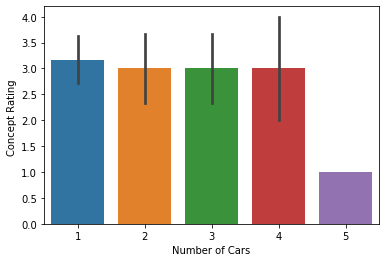

In [ ]:
sns.barplot(x='Number of Cars',y='Concept Rating ',data=data)

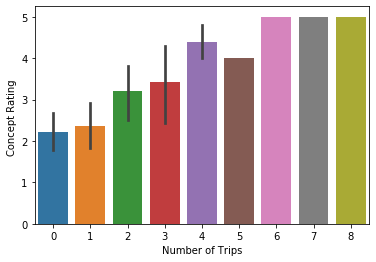

In [ ]:
sns.barplot(x='Number of Trips',y='Concept Rating ',data=data)

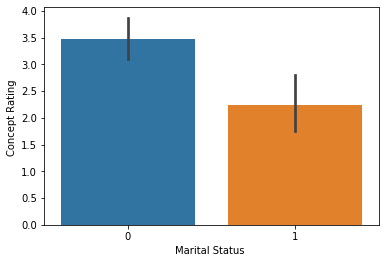

In [ ]:
sns.barplot(x='Marital Status ',y='Concept Rating ',data=data)

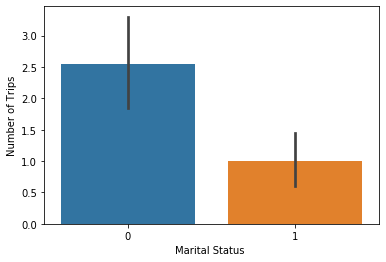

In [ ]:
sns.barplot(x='Marital Status ',y='Number of Trips',data=data)

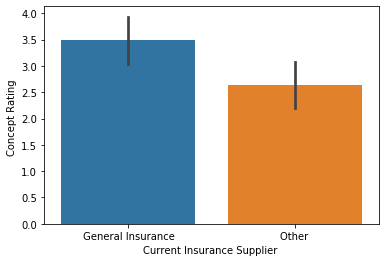

In [ ]:
sns.barplot(x='Current Insurance Supplier ',y='Concept Rating ',data=data)

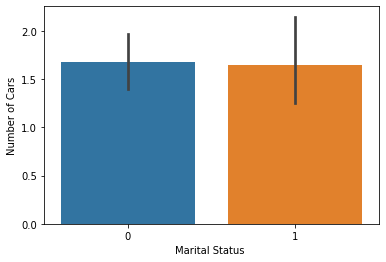

In [ ]:
sns.barplot(x='Marital Status ',y='Number of Cars',data=data)

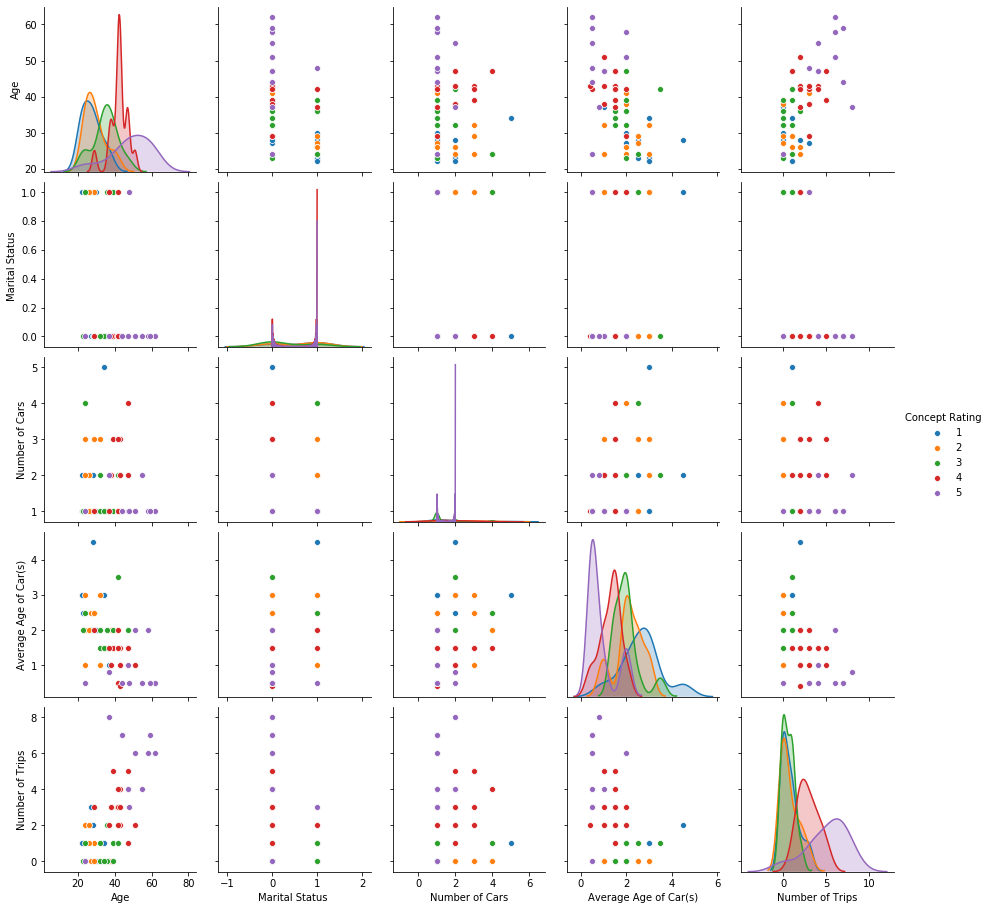

In [ ]:
sns.pairplot(data,hue='Concept Rating ')

FROM BAR PLOT:
1. People who take more number of trips have given more rating to the policy.
2. Married people are more likely to take more number of trips.
3. So, married people have given a higher rating.
4. Both married and single people have almost equal number of cars.
5. But, they are rarely go for trips and their rating are low.



FROM PAIR PLOT:
1. People who go for more number of trips have given more rating
2. People who have less number of cars(4 and less) have given rating upto 5
3. People of age ranging from 40 are mostly married and are more likely to take more number of trips but have cars less than 3.Also, they have given high ratings.
4. Married people are found to have more number of cars.
5. people who have more number of cars rarely go for the trips. 



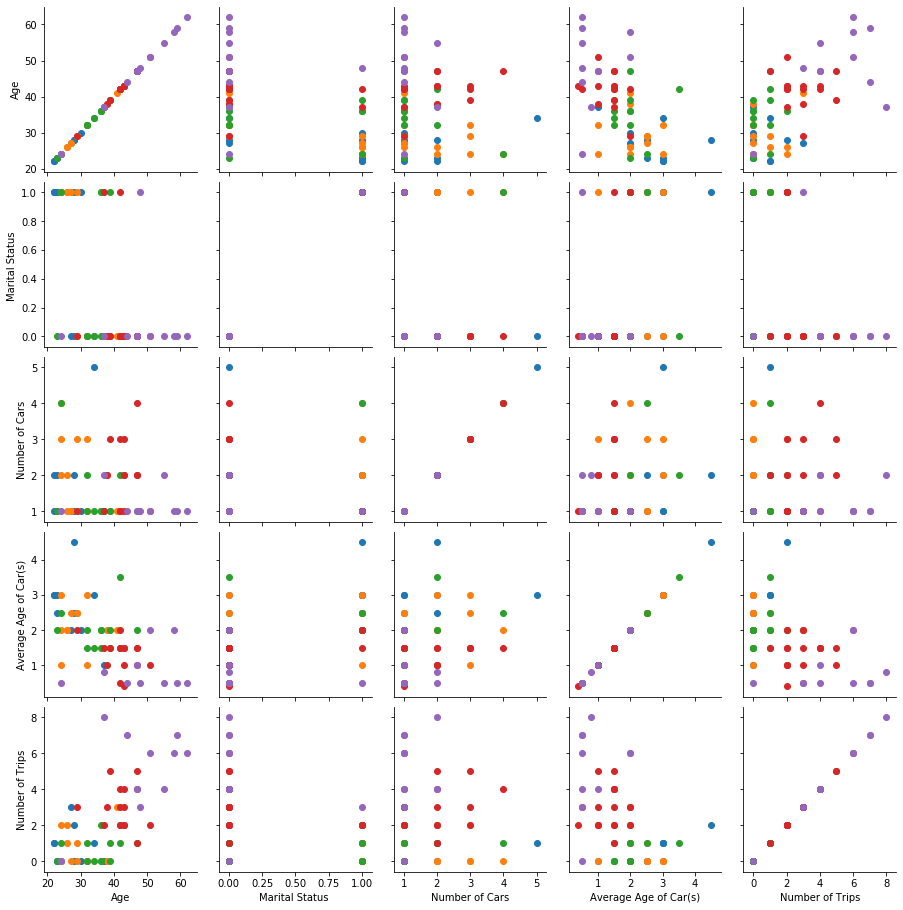

In [ ]:
g = sns.PairGrid(data,hue ='Concept Rating ')
g.map(plt.scatter)

In [ ]:
data.corr()

,Concept Rating,Age,Marital Status,Number of Cars,Average Age of Car(s),Number of Trips
Concept Rating,1.000000,0.738754,-0.430953,-0.138153,-0.688494,0.684537
Age,0.738754,1.000000,-0.510408,-0.149410,-0.541395,0.656999
Marital Status,-0.430953,-0.510408,1.000000,-0.012272,0.427077,-0.347068
Number of Cars,-0.138153,-0.149410,-0.012272,1.000000,0.231425,-0.035723
Average Age of Car(s),-0.688494,-0.541395,0.427077,0.231425,1.000000,-0.458491
Number of Trips,0.684537,0.656999,-0.347068,-0.035723,-0.458491,1.000000


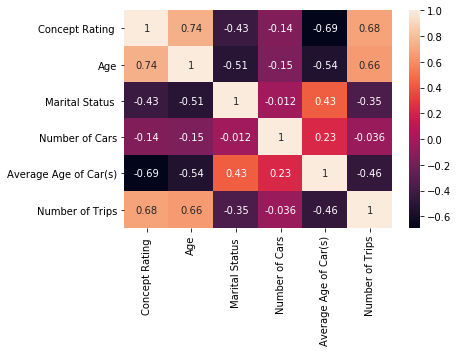

In [ ]:
sns.heatmap(data.corr(),annot = True)

In [ ]:
import plotly.graph_objects as go
print("Concept Rating Marital Status wise \n{}".format(data['Marital Status '].value_counts()))
#Gender wise distribution
fig = go.Figure(data=[go.Pie(labels=data['Marital Status '],hole=.5)])
fig.update_layout(title="Marital Status")
fig.show()

Concept Rating Marital Status wise 
0    40
1    20
Name: Marital Status , dtype: int64


married people are almost double as of single people


In [ ]:
print("Concept Rating \n{}".format(data['Concept Rating '].value_counts()))

Concept Rating 
4    16
3    12
2    12
5    10
1    10
Name: Concept Rating , dtype: int64


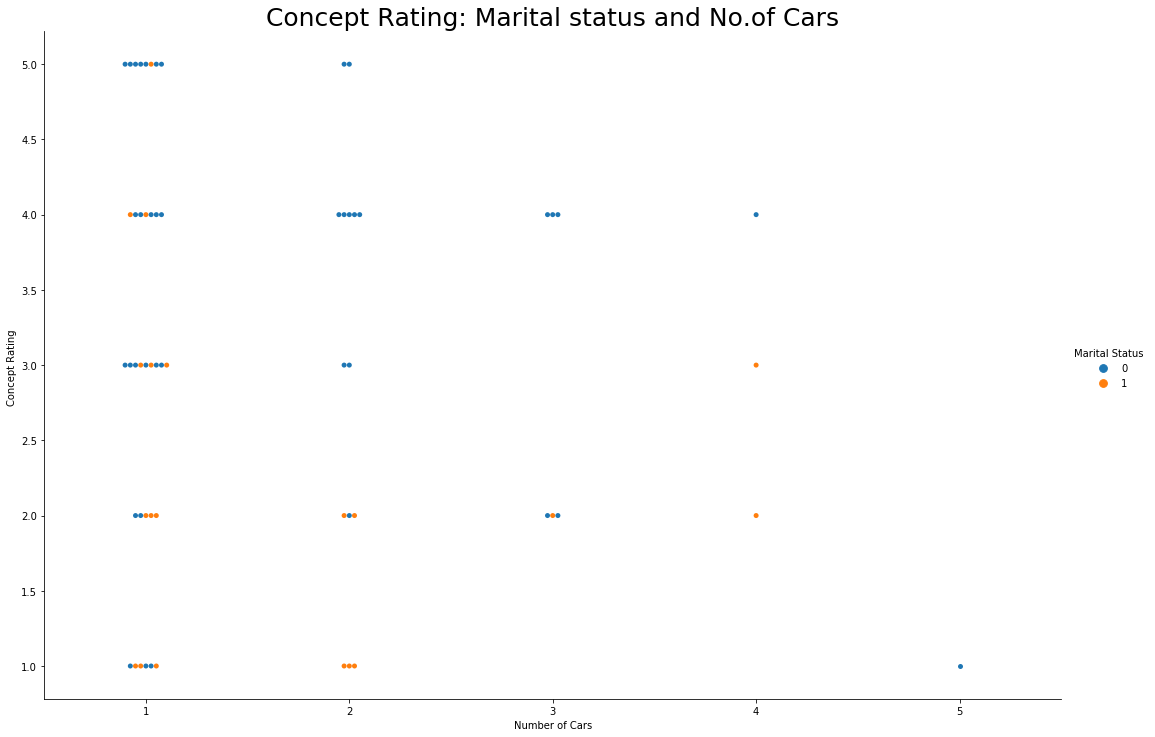

In [ ]:
#Create categorical variable graph for Marital Status,Concept Rating and Number of trips
sns.catplot(x="Number of Cars", y="Concept Rating ", hue="Marital Status ", kind="swarm", data=data,height=10,aspect=1.5)
plt.title('Concept Rating: Marital status and No.of Cars',size=25)
plt.show()

Focussing on the conceptual rating of 3 and above, married people who have atmost 3 cars have given higher rating 



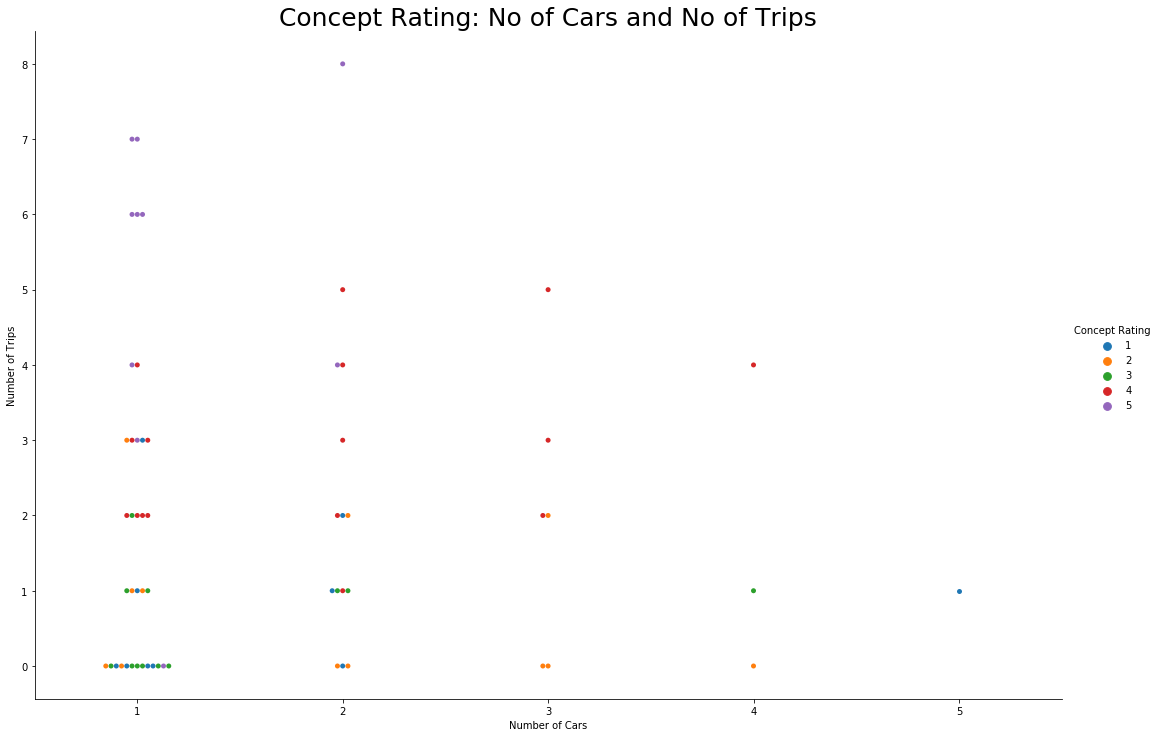

In [ ]:
sns.catplot(x="Number of Cars", y="Number of Trips", hue="Concept Rating ", kind="swarm", data=data,height=10,aspect=1.5)
plt.title('Concept Rating: No of Cars and No of Trips',size=25)
plt.show()

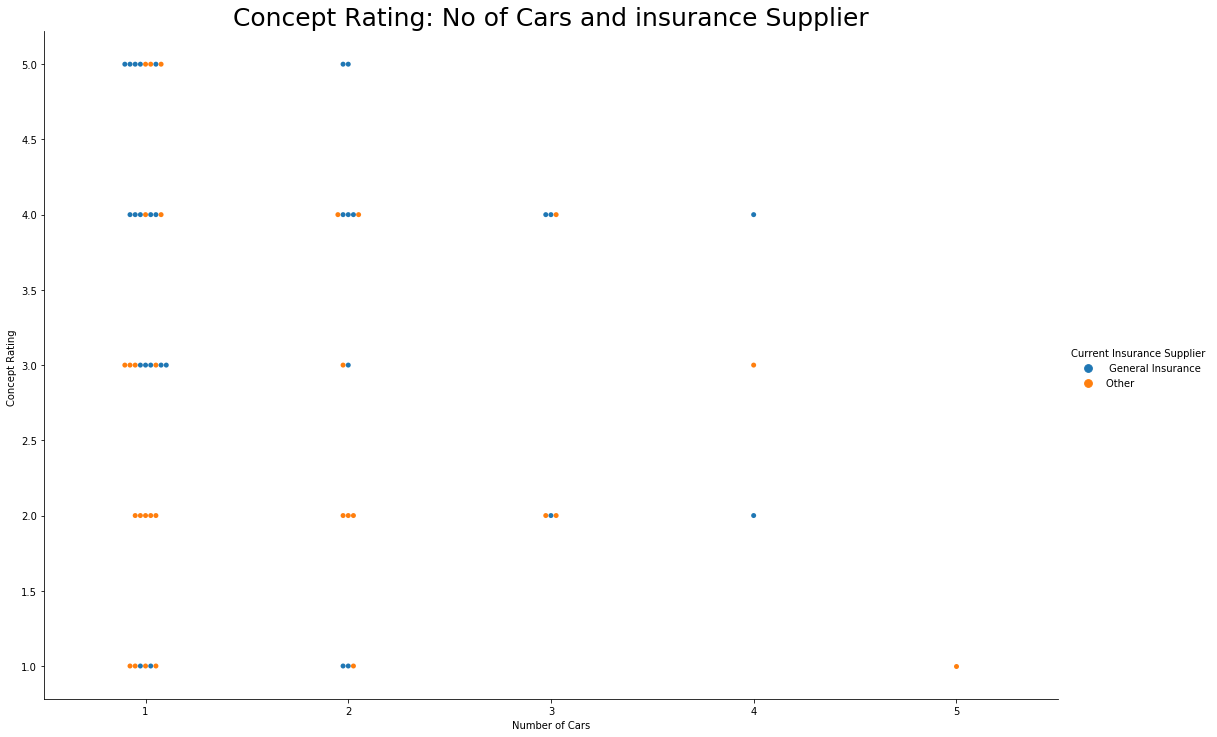

In [ ]:
sns.catplot(x="Number of Cars", y="Concept Rating ", hue="Current Insurance Supplier ", kind="swarm", data=data,height=10,aspect=1.5)
plt.title('Concept Rating: No of Cars and insurance Supplier',size=25)
plt.show()

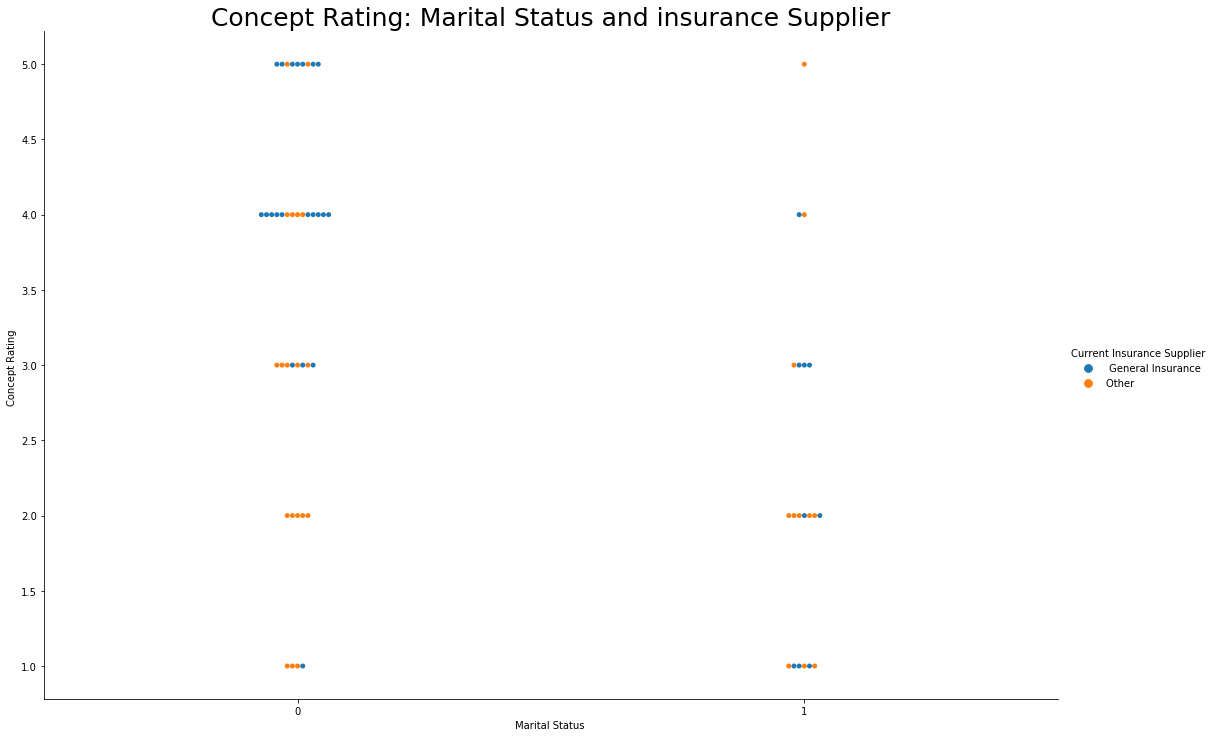

In [ ]:
sns.catplot(x="Marital Status ", y="Concept Rating ", hue="Current Insurance Supplier ", kind="swarm", data=data,height=10,aspect=1.5)
plt.title('Concept Rating: Marital Status and insurance Supplier',size=25)
plt.show()

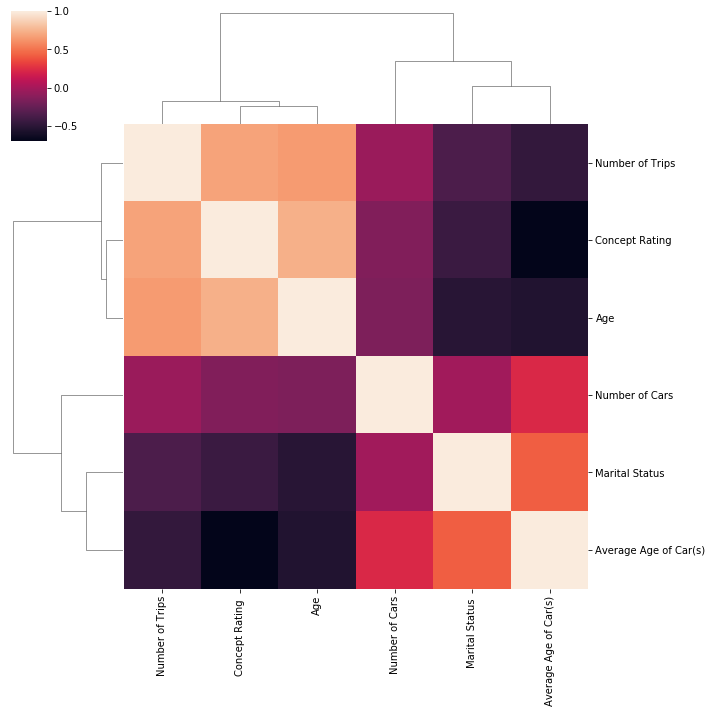

In [ ]:
sns.clustermap(data.corr())